In [18]:
from PIL import Image
import numpy as np

In [22]:
img = Image.open("noor.jpeg")

In [23]:
np.array(img).shape

(800, 800, 3)

In [25]:
np.array(img)

array([[[ 56,  88,  99],
        [ 64,  96, 107],
        [ 73, 105, 116],
        ...,
        [ 41,  54,  71],
        [ 41,  54,  71],
        [ 42,  55,  72]],

       [[ 65,  97, 108],
        [ 70, 102, 113],
        [ 76, 108, 119],
        ...,
        [ 42,  55,  72],
        [ 42,  55,  72],
        [ 42,  55,  72]],

       [[ 72, 104, 115],
        [ 74, 106, 117],
        [ 77, 109, 120],
        ...,
        [ 42,  55,  72],
        [ 42,  55,  72],
        [ 42,  55,  72]],

       ...,

       [[ 27,  28,  46],
        [ 27,  28,  46],
        [ 27,  28,  46],
        ...,
        [ 25,  31,  45],
        [ 23,  29,  43],
        [ 24,  30,  44]],

       [[ 27,  28,  46],
        [ 27,  28,  46],
        [ 27,  28,  46],
        ...,
        [ 25,  31,  45],
        [ 24,  30,  44],
        [ 24,  30,  42]],

       [[ 27,  28,  46],
        [ 27,  28,  46],
        [ 27,  28,  46],
        ...,
        [ 25,  31,  45],
        [ 24,  30,  44],
        [ 24,  30,  42]]

In [32]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, Conv2D, MaxPooling2D, MaxPool2D, Flatten

from keras.optimizers import SGD, Adam

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test)  = mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


Label =  5


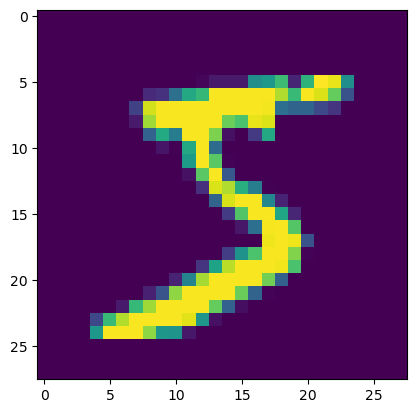

In [3]:
plt.imshow(x_train[0])
print("Label = ",y_train[0])

In [4]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [34]:
y_train.shape

(60000, 10)

In [39]:
model = Sequential()

In [40]:
model.add(Conv2D(input_shape = (28,28,1),filters = 16, kernel_size = (3,3), strides = (2,2),
                padding='valid',kernel_initializer = 'he_normal',
                activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides = (1,1)))

model.add(Flatten())

model.add(Dense(10, kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization())

model.add(Dense(10, kernel_initializer = 'he_normal', activation = 'softmax'))


In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 13, 13, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                23050     
                                                                 
 batch_normalization_1 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 10)               

In [42]:
optim = Adam()
model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [44]:
history = model.fit(x_train, y_train, epochs = 10, batch_size = 10, verbose = 2, validation_split = 0.4)

Epoch 1/10
3600/3600 - 5s - loss: 0.4066 - accuracy: 0.8890 - val_loss: 0.1931 - val_accuracy: 0.9560 - 5s/epoch - 1ms/step
Epoch 2/10
3600/3600 - 4s - loss: 0.1665 - accuracy: 0.9513 - val_loss: 0.0964 - val_accuracy: 0.9701 - 4s/epoch - 1ms/step
Epoch 3/10
3600/3600 - 4s - loss: 0.1335 - accuracy: 0.9582 - val_loss: 0.0989 - val_accuracy: 0.9713 - 4s/epoch - 1ms/step
Epoch 4/10
3600/3600 - 4s - loss: 0.1181 - accuracy: 0.9646 - val_loss: 0.0963 - val_accuracy: 0.9708 - 4s/epoch - 1ms/step
Epoch 5/10
3600/3600 - 4s - loss: 0.1073 - accuracy: 0.9669 - val_loss: 0.0937 - val_accuracy: 0.9721 - 4s/epoch - 1ms/step
Epoch 6/10
3600/3600 - 4s - loss: 0.0991 - accuracy: 0.9693 - val_loss: 0.0980 - val_accuracy: 0.9707 - 4s/epoch - 1ms/step
Epoch 7/10
3600/3600 - 4s - loss: 0.0899 - accuracy: 0.9727 - val_loss: 0.0913 - val_accuracy: 0.9739 - 4s/epoch - 1ms/step
Epoch 8/10
3600/3600 - 4s - loss: 0.0854 - accuracy: 0.9737 - val_loss: 0.0930 - val_accuracy: 0.9729 - 4s/epoch - 1ms/step
Epoch 9/

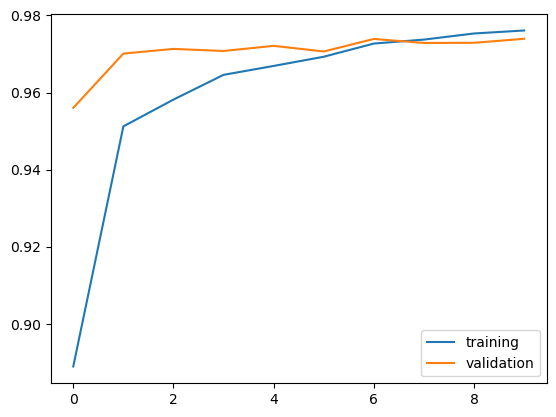

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.show()

In [46]:
model.evaluate(x_train, y_train)

1875/1875 [==============================] - 1s 743us/step - loss: 0.0522 - accuracy: 0.9850


[0.05219613388180733, 0.9850166440010071]

In [47]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 711us/step - loss: 0.0789 - accuracy: 0.9766


[0.07892560213804245, 0.9765999913215637]